<a href="https://colab.research.google.com/github/yovich99/PROJET_EDP_DIAMANT/blob/master/Projet_Incertitudes_YO_Ouedraogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rapport du projet Incertitudes dans Openturns 




In [ ]:
!pip install openturns==1.16

     |████████████████████████████████| 47.3MB 96kB/s 


# Projet: 

L'objectif du projet est de trouver la meilleure distribution qui approche les données de magnitude des séismes dans le catalogue des séismes international récupérer sur le site: https://www.kaggle.com/usgs/earthquake-database  

les dates du séismes: 1965-2016

In [ ]:
import openturns as ot
import numpy as np
import openturns.viewer as viewer
from matplotlib import pylab as plt
from __future__ import print_function



# Question 1: Lecture des données

*   M variable àléatoire  modélisant la magnitude du séisme 

* $P(m>M)$ la probabilité d'observé un séisme de mag > m

* $S(m) = P(M>m)$    fonction de survie
  







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = ot.Sample_ImportFromTextFile("/content/drive/MyDrive/earthquakes-1965-2016-clean.csv")
#data = ot.Sample_ImportFromTextFile("earthquakes-1965-2016-clean.csv")

sample = data[:,3]

taille = np.size(sample)
print("taille de l'échantillon =",taille)
#sample

taille de l'échantillon = 23412


La taille de l'échantillon est de 23412

In [ ]:
minsample = np.min(sample)
maxsample = np.max(sample)


La valeur min des magnitudes = 5.5

La valeur max des magnitudes = 9.1



In [ ]:
z=np.array(sample).tolist()
b=[]
for i in range(np.size(z)-1):
  b.append(z[i][0])
res_list = [i for i in range(len(b)) if b[i] == maxsample]
eve1=data[res_list[0],:]
eve2=data[res_list[1],:]
print('Evenement1:\n','Jour:',eve1[1],'\t Mois:',eve1[0],'\t Année:',eve1[2],'\t Magnitude:',eve1[3])
print('\n Evenement2:\n','Jour:',eve2[1],'\t Mois:',eve2[0],'\t Année:',eve2[2],'\t Magnitude:',eve2[3])

Evenement1:
 Jour: 26.0 	 Mois: 12.0 	 Année: 2004.0 	 Magnitude: 9.1

 Evenement2:
 Jour: 11.0 	 Mois: 3.0 	 Année: 2011.0 	 Magnitude: 9.1


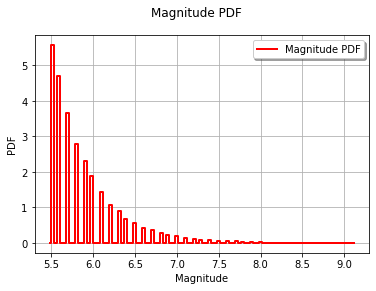

(array([1.4106e+04, 5.6570e+03, 1.8090e+03, 1.1010e+03, 3.9300e+02,
        2.1400e+02, 1.0400e+02, 1.9000e+01, 5.0000e+00, 3.0000e+00]),
 array([5.5 , 5.86, 6.22, 6.58, 6.94, 7.3 , 7.66, 8.02, 8.38, 8.74, 9.1 ]),
 <a list of 10 Patch objects>)

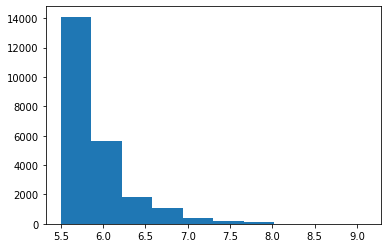

In [ ]:
#Histogram
x =np.histogram(sample)
graph= ot.HistogramFactory().build(sample).drawPDF()
view = viewer.View(graph)
plt.show()
plt.hist(b)


# Observation:
 
 On observe que l'histogramme suit une loi exponetielle car ça déscente est extrêmement rapide.

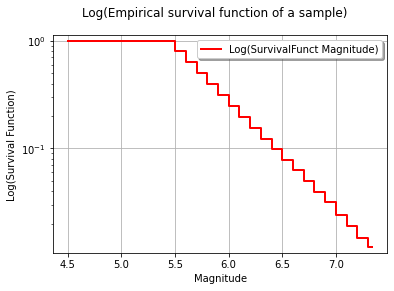

In [ ]:

userdefined= ot.UserDefined(sample)

survivalF= userdefined.drawSurvivalFunction()
survivalF.setTitle("Log(Empirical survival function of a sample)")
survivalF.setYTitle("Log(Survival Function)")
survivalF.setLegendPosition("topright")
survivalF.setLegends(["Log(SurvivalFunct Magnitude)"])
survivalF.setLogScale(ot.GraphImplementation.LOGY)
view = viewer.View(survivalF)
#


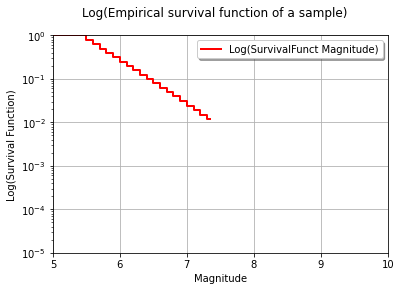

In [ ]:
x= survivalF.getBoundingBox()
lower = x.getLowerBound()
upper = x.getUpperBound()
lower[0] = 5.0
upper[0] = 10
lower[1] =1e-5
upper[1] = 1.0 
newinterval = ot.Interval(lower, upper)
survivalF.setBoundingBox(newinterval)

view = viewer.View(survivalF)
view.save("Log_Empirical survival func_sample")

In [ ]:
def drawSurvivalVsSample(sample, distribution, xmin=5.0, xmax=10.0):
  """ Dessine la fonction de survie empirique de l'échantillon et de la distribution.
  Parameters ---------
  sample : ot.Sample 
  L'échantillon. 
  distribution : ot.Distribution
  La distribution. 
  xmin : float La magnitude minimale.
  xmax : float La magnitude maximale.
  Returns ------graph : ot.Graph Le graphique. """ 
  #1.Draw survival function of distribution 
  logScaleX = True
  sample_size = np.size(sample)
  graph = distribution.drawSurvivalFunction(xmin, xmax, sample_size, logScaleX)
  
  namedist = distribution
  graph.setTitle("Log(Survival function of "+str(namedist)+")")
  graph.setYTitle("Log(Survival function)")
  graph.setXTitle("Magnitude")
  labelx = str(namedist)
  graph.setLegends(["Log(Survival function of "+labelx[0:11]+")"]) 
  graph.setLegendPosition("topright")
  view= viewer.View(graph)
  view.save("Log(Survival function of "+labelx[0:12]+")")
 
  #TODO 
  # 2. Draw survival function of sample
  userdefined = ot.UserDefined(sample) 
  curveSample = userdefined.drawSurvivalFunction(xmin, xmax, sample_size, logScaleX) 
  curveSample.setTitle( "Log(Emperical Survival function of Magnitude)") 
  curveSample.setYTitle("Log(Survival function)")
  curveSample.setLegends(["Log(Survival function of Magnitude)"])
  curveSample.setLegendPosition("topright")
  view= viewer.View(curveSample)
  view.save("Log(Emperical Survival function of Magnitude)")

  
  #TODO 
  graph.setColors(["blue"])
  graph.setXTitle("Magnitude")
  graph.add(curveSample) 
  # 3. Configure the plot in semi-log scale
  graph.setLogScale(ot.GraphImplementation.LOGY)
  
  print("CURVE SAMPLE ADD")
  #TODO 
  # 4. Set bounding box
  lower_bound = ot.Point([xmin, 1.0e-5]) 
  upper_bound = ot.Point([xmax, 1.0e0])
  interval = ot.Interval(lower_bound, upper_bound) 
  graph.setBoundingBox(interval)
  graph.setLegendPosition("topright")
  view= viewer.View(graph)
  view.save("Log(Emperical Surv func of Magnitude and)"+labelx[0:11]+")")
  view.close()
  return graph
  


In [ ]:
#Exemple
dist = ot.Exponential(3,6)
v=dist.getSample(100)

#drawSurvivalVsSample(sample,dist)


# Question 2:
Comparaison des scores BIC pour les différentes loi  de Openturns. BiC( Bayesian Information Criterion) 

* Cette méthode permet de hiérarchiser un ensemble de distributions candidates en utilisant un échantillon, ici les magnitudes des séismes. 
* Les paramètres de chaque loi sont déterminés par la méthode de vraissemblance.
* La limite de cette méthode est que les modèles ayant moins de paramètres sont pénalisés. Le critère BIC sert à corriger cela en pénalisant à son tour les modèles avec plus de paramètres. 

In [ ]:
#On récupère la liste des distri de ot
distrib = ot.DistributionFactory.GetContinuousUniVariateFactories()
print(distrib)
Factories = []
BicResults = ot.Sample(len(distrib),2)
k=0 # le compteur des scores BIC
for i in distrib:
    BicResults[k,1]=k+1 #on indexe chaque distribution par un numéro.
    try:
    #if str(i).startswith('Histogram') or str(i).startswith('DirichletFactory') or str(i).startswith('FisherSnedecorFactory') or str(i).startswith('MeixnerDistributionFactory') or str(i).startswith('RayleighFactory') or str(i).startswith('TriangularFactory')or str(i).startswith('ParetoFactory'):
        # ~ non-parametric
        #remove histogram
       if str(i)=='HistogramFactory':
        print("Do not build ", i)
        k=k+1
        
       else:
        BicResults[k,0]=ot.FittingTest.BIC(data.getMarginal(3),i)[1]   
        k=k+1   
        Factories.append(i)
    except TypeError:
       print("Cannot build ", i)
       k=k+1
print(BicResults)


[ArcsineFactory,BetaFactory,BurrFactory,ChiFactory,ChiSquareFactory,DirichletFactory,ExponentialFactory,FisherSnedecorFactory,FrechetFactory,GammaFactory,GeneralizedParetoFactory,GumbelFactory,HistogramFactory,InverseNormalFactory,LaplaceFactory,LogisticFactory,LogNormalFactory,LogUniformFactory,MeixnerDistributionFactory,NormalFactory,ParetoFactory,RayleighFactory,RiceFactory,StudentFactory,TrapezoidalFactory,TriangularFactory,TruncatedNormalFactory,UniformFactory,WeibullMaxFactory,WeibullMinFactory]#30
Cannot build  DirichletFactory
Cannot build  FisherSnedecorFactory
Do not build  HistogramFactory
Cannot build  MeixnerDistributionFactory
Cannot build  TriangularFactory
 0 : [  1.79769e+308  1            ]
 1 : [ -0.620917      2            ]
 2 : [  6.68153       3            ]
 3 : [  1.49102       4            ]
 4 : [  4.3692        5            ]
 5 : [  0             6            ]
 6 : [  0.0801479     7            ]
 7 : [  0             8            ]
 8 : [ -0.288197      9

# Question 2: Détermination des paramètres. 



In [ ]:
#SortAccording to component.
sample2 = BicResults.sortAccordingToAComponent(0)
#On détermine la distribution avec le meilleure test BIC i.E LE 
k=1
for i in distrib:
  
  if k==sample2[0,1]:
    print(str(i))
  k=k+1

#Métode 2  pour afficher le meilleur testbic
bestbic = ot.FittingTest_BestModelBIC(sample,Factories)
print(bestbic)





BetaFactory
[class=Beta name=Beta dimension=1 alpha=0.624883 beta=5.25417 a=5.49985 b=9.10015, -0.6209171359937677]


In [ ]:
#Les coefficients avec la méthode build

paramBeta= ot.BetaFactory().build(sample)
paramBeta


class=Beta name=Beta dimension=1 alpha=0.624883 beta=5.25417 a=5.49985 b=9.10015

#  **Quelle méthode est utilisé par la méthode Build?**

La méthode utilisé par build est soit la méthode de maximum vraissemblance , la méthode des moments ou la méthode kernel fitting en fonction des données.

CURVE SAMPLE ADD


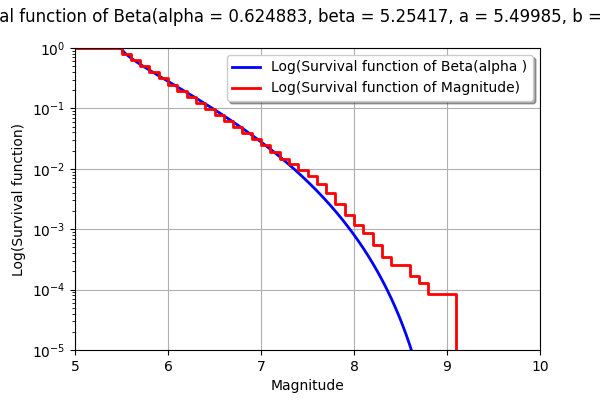

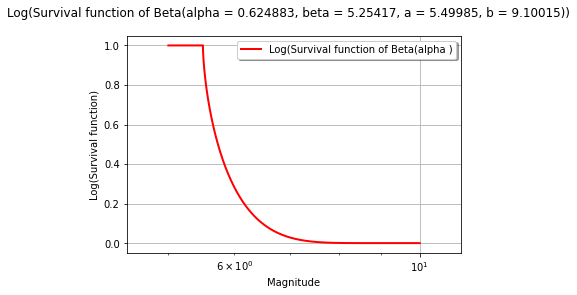

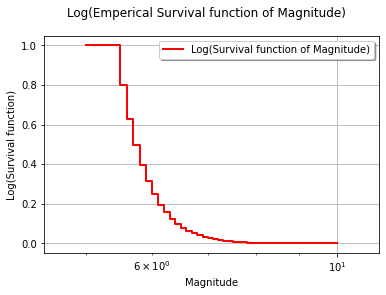

In [ ]:
#La méthode DrawSurvival

drawSurvivalVsSample(sample,bestbic[0])



On observe que les séismes de magnitude 5 à 7.4 sont bien approchés,simuler par la distribution de Beta que l'on a déterminé avec le test du critère Bayésien d'information (BIC) sur les données de magnitude. 
Entre ~7.5 et 10 l'erreur  entre les données et la distribution de Beta augmente.

In [ ]:
#Fitting test Lilliefors

ot.ResourceMap.SetAsUnsignedInteger("FittingTest-LillieforsMaximumSamplingSize",1000)
bestbic[0]
dist, result = ot.FittingTest.Kolmogorov(sample,ot.BetaFactory(),0.01)
print('Conclusion=', result.getBinaryQualityMeasure(), 'P-value=', result.getPValue())
print(dist)
print(result)

Conclusion= False P-value= 0.0
Beta(alpha = 0.624883, beta = 5.25417, a = 5.49985, b = 9.10015)
class=TestResult name=Unnamed type=Lilliefors Beta binaryQualityMeasure=false p-value threshold=0.01 p-value=0 statistic=0.19473 description=[Beta(alpha = 0.624883, beta = 5.25417, a = 5.49985, b = 9.10015) vs sample Unnamed]


# Question 2: La fonction de répartition de l'échantillon et de la loi Beta

Beta(alpha = 0.624883, beta = 5.25417, a = 5.49985, b = 9.10015)


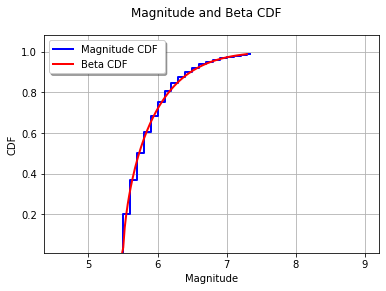

In [ ]:

graph2 = userdefined.drawCDF()

bestbicCDF = bestbic[0].drawCDF()
print(bestbic[0])
graph2.setColors(["blue"])
graph2.add(bestbicCDF)
graph2.setLegends(["Magnitude CDF ","Beta CDF"])
graph2.setTitle("Magnitude and Beta CDF")
lower = x.getLowerBound()
upper = x.getUpperBound()
upper[1] = 1.08
upper[0]= 9.2
interval = ot.Interval(lower, upper) 
graph2.setBoundingBox(interval)

view= viewer.View(graph2)
view.save("Magnitude and Beta CDF")



On a une bonne approximation de la fonction de répartition de l'échantillon par  la distribution de Beta. 

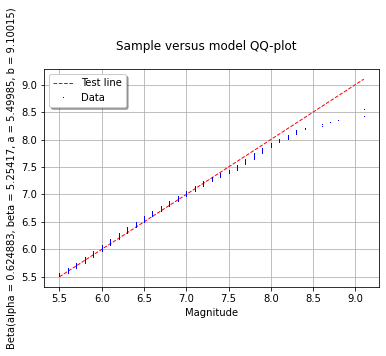

In [ ]:
#Draw QQplot
graph = ot.VisualTest.DrawQQplot(sample,bestbic[0])
view = viewer.View(graph)

On observe que à partir des seismes de magnitudes 7.5, il n'y a plus concordance entre les quantiles de la distribution et ceux de l'échantillon. Ce qui implique que les probabilités sont différentes.



# **QUESTION** 3 : Preuve de l'insuffisance du critère BIC

* On prouve que le critère BIC ne suffit pas toujours pour trouver la meilleur loi qui approxime les données de l'échantillon. 
* On trace la fonction de survie de l'exponentielle avec les paramètres déterminer depuis l'échantillon.

In [ ]:
exp_dist = ot. ExponentialFactory().build(sample)
exp_dist

class=Exponential name=Exponential dimension=1 lambda=2.61263 gamma=5.49977

**Quelle est la méthode utilisé par la méthode build?**
Le gamma est déterminé par la méthode du maximum vraissemblance et le Lambda par la méthode des moments

CURVE SAMPLE ADD


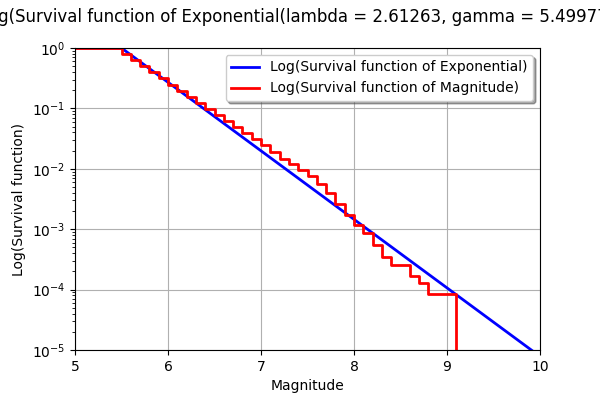

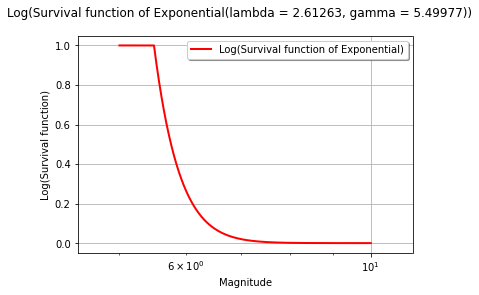

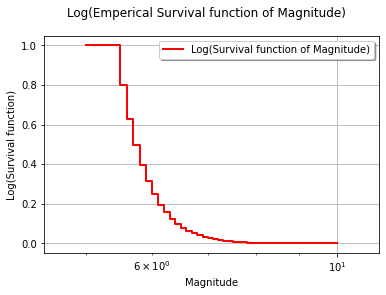

In [ ]:
drawSurvivalVsSample(sample,exp_dist)

# **Observations**:
On observe que la distribution exponentielle, approche bien les données de l'échantillon, mieux que dans la distribution de la question 2 pour les magnitudes de séimes entre 7 et 9.1

# **Pourquoi le choix du modèle exponentielle?**
La loi exponentielle a été choissi car elle modélise les magnitudes des séismes avec la même régularité que la loi de Gutenberg-Richter mais avec un paramètre différent.


Le modèle de GutenbergRichter est fondé sur l’observation qu’il y a moins de séismes de grande magnitude que de séismes de petite magnitude. Elle stipule que :

$N = 10^{a−bM}$ 

M = magnitude du séisme

N = le nombre de séisme de magnitude supérieur à M

a et b sont des constantes indépendantes 

b est le paramètre le plus important du modèle

le lien entre les deux loi (Gutenberg et la loi exponentielle) est : 

$ b = \frac{\lambda}{log(10)}$





# **Rappel sur la méthode de kijko**
$ t = x_n + \int^{t}_{\gamma} F(x)^{n} d x $
  
  ça se résume à résoudre cette équation non-linéaire en t.

$x_n$ est la magnitude maximale des séismes de l'échantillon
 
$F(x)$ est la fonction de répartion de loi exponentielle tronqué. 

   $n$ =taille de l'échantillon
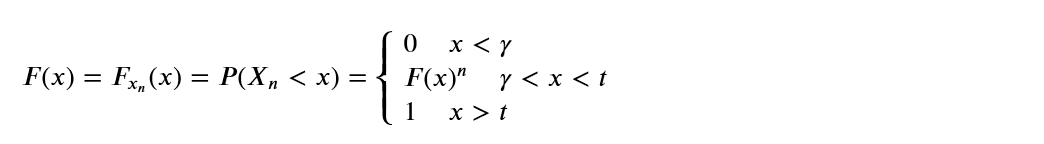
  


$ F(x| \gamma \le x \le t) = \frac{F(x)-F(\gamma)}{F(t)-F(\gamma)} $

* Comme $\gamma$ correspond à la magnitude minimale pour être catalogué dans registre des séimes 

$F(\gamma) = 0$ 

$ F(x| \gamma \le x \le t)  =  \frac{F(x)}{F(t)}  

\forall x \in [\gamma,t]  $

$ F(x| \gamma \le x \le t) =  \frac{1-exp[-\lambda(x-\lambda)]}{1-exp[-\lambda(t-\lambda)]}$



# La B-valeur du modèle de Guntenberg

In [ ]:
#La b_valeur de Gutenberg
lambda_exp,gamma_exp=exp_dist.getParameter()
 
bvalue = lambda_exp/np.log(10)
print(" La valeur du paramètre b estimé est=",bvalue)


 La valeur du paramètre b estimé est= 1.1346489765068681


In [ ]:
#Différences BIC 

bicExp = ot.FittingTest_BIC(sample,exp_dist)

print("La valeur bic de la loi exponetielle =",bicExp)
print("La valeur bic minimale de toutes les loi=",bestbic[1])

La valeur bic de la loi exponetielle = 0.07928844690517244
La valeur bic minimale de toutes les loi= -0.6209171359937677


# Observations:

La valeur BIC de la distribtion exponentielle est supérieur à celle de la valeur de Beta déterminé par comparaison de plusieurs distributions.
Pourquoi?
Le critère BIC ne suffit pas à déterminer la meilleure distribution qui approche les données de l'échantillon. 
La distribution de la loi exponetielle réalise une meilleur estimation sur les données de l'échantillon.



# Question 4: Détermination de la loi des estimateurs des paramètres $\lambda$ et $\gamma$ et de leurs intervalles de confiance.



[2.61328]
[0.0207589]


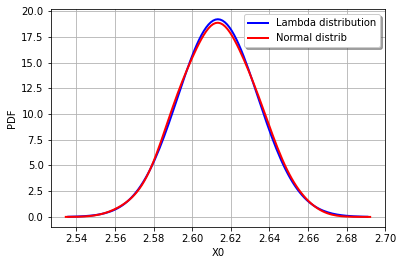

In [ ]:
#Construire les distributions des estimateurs.
dist_parameter = ot.ExponentialFactory().buildEstimator(sample)
dist = dist_parameter.getParameterDistribution()
lamda_estimate = dist.getMarginal(0)
moy =lamda_estimate.getMean()
var =lamda_estimate.getStandardDeviation()
print(moy)
print(var)
p =ot.Normal(moy[0],var[0])
gr =p.drawPDF()
gr.setColors(["blue"])
#gr.setLegends(["Normal"])
gr.add(lamda_estimate.drawPDF())
gr.setLegends(["Lambda distribution","Normal distrib"])

view =viewer.View(gr)
view.save("Lambda distribution and Normal distribution")

#Quelque chose c'est produit, la méthode buildEstimator() ne produit pas la distriution du second paramètre.

# Observations:
On observe que le paramètre lambda suit une loit normale.

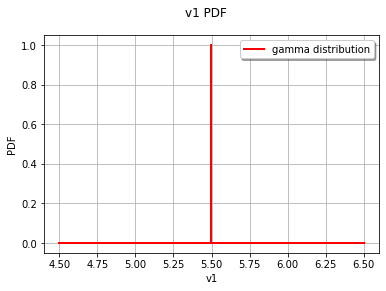

In [ ]:
gamma_estimate = dist.getMarginal(1)
gammaPDF=gamma_estimate.drawPDF()
gammaPDF.setLegends(["gamma distribution"])
view =viewer.View(gammaPDF)
view.save("gamma distribution")


# Observation:
 La méthode getParameterDistribution n'a produit qu'une seule valeur de gamma. ça peut s'expliquer car gamma correspond à la valeur minimale de magnitude permettant à un séisme d'entré dans le catalogue.


In [ ]:
#Determine the confidence interval of the parameters
alpha = 0.95  
lamda_interv =lamda_estimate.computeBilateralConfidenceInterval(alpha)
print("Interval de confiance de lambda =", lamda_interv)
gamma_interv =gamma_estimate.computeBilateralConfidenceInterval(alpha)
print("\n l'interval de confiance de gamma=", gamma_interv)


Interval de confiance de lambda = [2.57272, 2.65357]

 l'interval de confiance de gamma= [5.49977, 5.49977]


# **Que peut-on conclure?**
 L'interval de confiance contient la moyenne de la distribution de lambda déterminé plus haut.

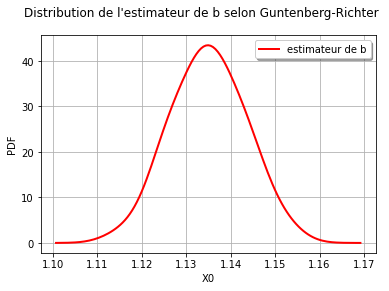

In [ ]:
#Distribution associé au b_value de Gutenberg
b_dist = lamda_estimate/np.log(10)

graph_bval=b_dist.drawPDF()
graph_bval.setTitle("Distribution de l'estimateur de b selon Guntenberg-Richter ")
graph_bval.setLegends(["estimateur de b"])

view =viewer.View(graph_bval)
view.save("distrib b-Gutenberg_Richter")



In [ ]:
#b_value confidence interval
b_interv =b_dist.computeBilateralConfidenceInterval(alpha)
b_interv

class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[1.11732] upper bound=class=Point name=Unnamed dimension=1 values=[1.15243] finite lower bound=[1] finite upper bound=[1]

# **Question 5:** Détermination des paramètres $\lambda$ et $\gamma$ par la méthode des moments et un algorithme d'optimisation.  On remarque le paramètre $\lambda_5$ n'est pas l'intervalle de confiance déterminer à la question 4. 

In [ ]:
#Q5
lambda_init = 7
dist_exp2 = ot.Exponential(lambda_init, 5.5)


In [ ]:
#La méthode des moments
distribution1 = dist_exp2
print(distribution1.getParameterDescription())
factory = ot.MethodOfMomentsFactory(distribution1)
factory.setKnownParameter([5.5], [1])
lowerBound = [ot.SpecFunc.MinScalar]  # lambda > 0
upperBound = [ot.SpecFunc.MaxScalar]

finiteLowerBound = [True]
finiteUpperBound = [False]
interval = ot.Interval(lowerBound, upperBound, finiteLowerBound, finiteUpperBound)
factory.setOptimizationBounds(interval)
distrib_factory = factory.build(sample)
lamda_gamma_parameters = distrib_factory.getParameter()
print(distrib_factory)
print("\n La valeur du paramètre Lambda estimé = ",lamda_gamma_parameters[0])

[lambda,gamma]
Exponential(lambda = 2.47008, gamma = 5.5)

 La valeur du paramètre Lambda estimé =  2.470075571061502


CURVE SAMPLE ADD


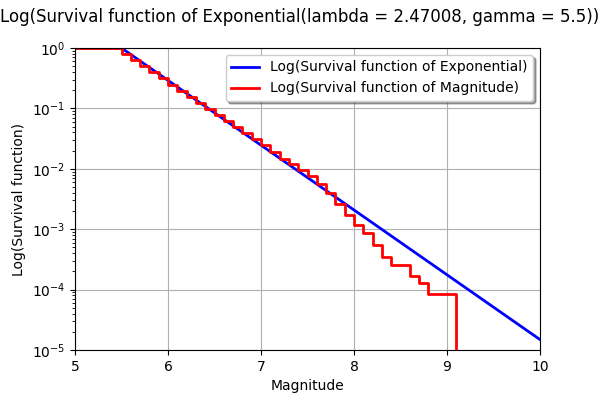

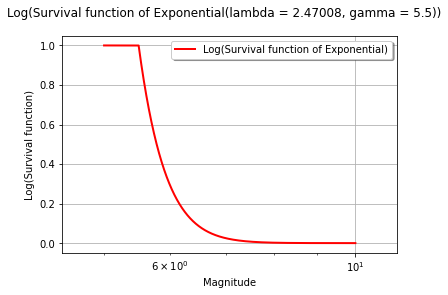

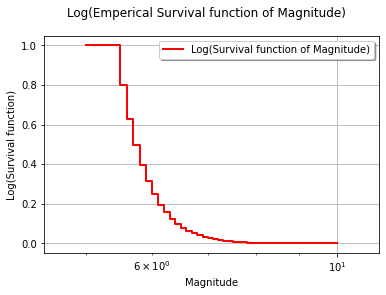

In [ ]:
#La fonction de survie
drawSurvivalVsSample(sample,distrib_factory)

# Observations:

On observe que le distribution obtenu par la méthode des moments n'approxime pas bien les séismes de magnitudes supérieur à 8. L'estimation à la question 3 est meilleure pour le moment.

# Comparaison avec les paramètres de la question 4:

On remarque que le $\lambda$ de la question 5 n'est pas dans l'interval de confiance de la question 4

$\lambda_5$ $\notin$ [2.56883, 2.65269] 

# **Question 6**: Utilisation de la loi exponetielle tronqué pour approché les données.




In [ ]:
#Truncated exponential

def build_truncated_exponential(lambda_parameter, gamma, t):
 """
  Create a truncated exponential distribution.
  Parameters
  ----------
  lambda_parameter : float
  The parameter Lambda.
  gamma : float
  The location parameter
t : float
The upper truncation bound.
Returns
-------
truncated_exponential : ot.TruncatedDistribution.
The truncated exponential distribution.
"""
#TODO
 
 expo_instance = ot.Exponential(lambda_parameter, gamma)
 truncated_exponential = ot.TruncatedDistribution(expo_instance,t, ot.TruncatedDistribution.UPPER)
 return truncated_exponential

In [ ]:
#
trunc_x = build_truncated_exponential(lamda_gamma_parameters[0],5.5,maxsample)
trunc_x

class=TruncatedDistribution name=TruncatedDistribution distribution=class=Exponential name=Exponential dimension=1 lambda=2.47008 gamma=5.5 bounds=class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[5.5] upper bound=class=Point name=Unnamed dimension=1 values=[9.1] finite lower bound=[1] finite upper bound=[1] thresholdRealization=0.5

# L'estimateur t
t est l'estimateur non biaisé de $E[X_n)]$.Avec $X_n$ la variable aléatoire de la plus grande observation de l'échantillon. (Kijko)



CURVE SAMPLE ADD


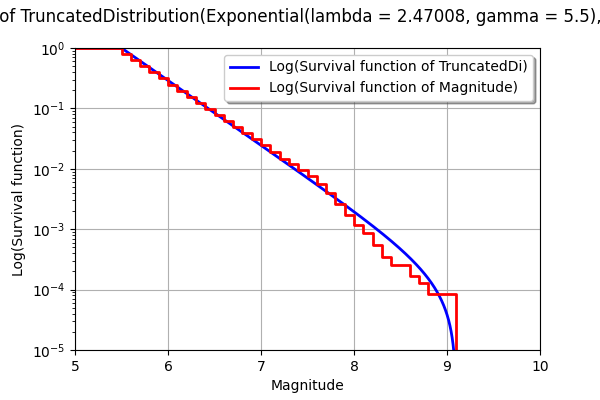

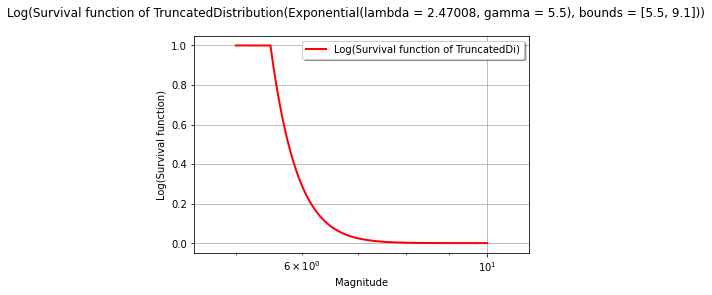

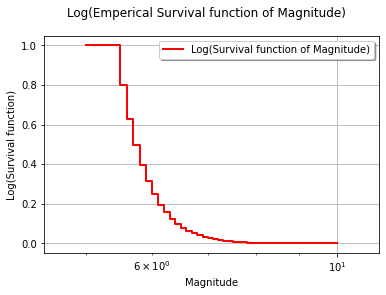

In [ ]:
drawSurvivalVsSample(sample,trunc_x)

###  Observations:

On observe que la troncature par la borne supérieur approche mieux les séismes de magnitudes supérieur à 8  comparer à loi exponentielle libre de la question 5

# Les limites du modèle:


1. Pour lambda loin de la valeur vrai la méthode ne pourra pas produire une courbe satisfaisante. 

2. Si n est très grand il sera imposible de donner la valeur maximale de la magnitude du séisme et donc impossible de faire une troncature supérieur de l'exponetielle.


#  **Question 7:** On utilise la méthode de kijko pour déterminer la l'odre de la troncature. 


In [ ]:
def integrand(input_point): 
  
  """ Calcul de l'intégrande impliqué dans la méthode de Kijko.
Evalue l'intégrande F(x)^n où x est la magnitude du séisme, F est la fonction de répartition de la loi exponentielle tronquée de paramètres lambda, gamma et t, et n est la taille de l'échantillon.
Implémente Kijko, 2004, Eq.(1) et Eq.(5).
Utilise implicitement la variable "sample".
Parameter --------input_point : ot.Point(4) Le vecteur (x, lambda, gamma, t).
Returns ------output_point : list(1) La valeur de l'intégrande. """

#récupérons la fonction de repartion tronquer à partir de la question 6
  #trunc_x = build_truncated_exponential(input_point [1],input_point[0],input_point[3])
  
  output_point = ot.Point(1)
  x=input_point[0]
  lamda_x= input_point[1]
  gamma_x=input_point[2]
  t_x =input_point[3]
  #xp = ot.Point([x])
  #truncCDF = trunc_x.computeCDF(xp[0])
  if x<gamma_x:
    output_point[0] = 0
  elif x<t_x:
    r1 = 1-np.exp(-lamda_x*(x-gamma_x))/(1-np.exp(-lamda_x*(t_x-gamma_x)))
    #print(r1**taille)
    output_point[0] = r1**taille
    
  else:
    output_point[0] =1  
   
  return output_point 

In [ ]:
#test du code
#Paramatere de la question 5 
#parameter_exp = exp_dist.getParameter() 
point = ot.Point([8.7,lamda_gamma_parameters[0],lamda_gamma_parameters[1],maxsample])
output = integrand(point)
output


class=Point name=Unnamed dimension=1 values=[0.000175848]

# Creation de la python Function.


In [ ]:
# Penser à corriger la fonction integrand
integrand_Py= ot.PythonFunction(4, 1, integrand)
p= integrand_Py(point)
p

class=Point name=Unnamed dimension=1 values=[0.000175848]

In [ ]:
#Creation de la fonction parametrique
indx_parameter = [1,2,3]
gamma_fix = 5.5

fixed_parameter =[lamda_gamma_parameters[0],gamma_fix,maxsample]

parametric_integrand =ot.ParametricFunction(integrand_Py,indx_parameter,fixed_parameter)
m= ot.Point([8.7])
x1=parametric_integrand(m)
x1


class=Point name=Unnamed dimension=1 values=[0.000175848]

Dans l'énoncé on nous demande d'utiliser 9 au deuxième test alors que le premier test ce fait avec 8.7.
Quand on effectue le deuxième test avec 8.7 on obtient la même valeur.

[class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[3.76204e-274], class=Point name=Unnamed dimension=1 values=[1.14113e-223

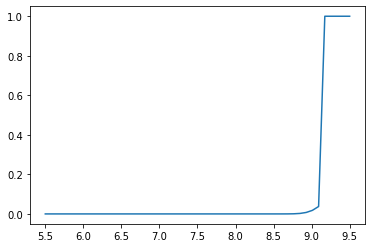

In [ ]:
#Dessinons la fonction parametric entre gamma et 9.5
maxgamma= 9.5
lst = np.linspace(gamma_fix,maxgamma,50)
#print(lst)
magnitude_lst = []
for i in lst:
  magnitude = ot.Point([i])
  magnitude_lst.append(parametric_integrand(magnitude))
print(magnitude_lst)  
plt.plot(lst,magnitude_lst)




On observe que toute les valeurs sont presques toutes nulles entre 5.5 et 9.1

In [ ]:
quadrature_rule = ot.GaussKronrodRule(ot.GaussKronrodRule.G11K23) 
maximumSubIntervals = 100
maximumError = 1.0e-8
algo = ot.GaussKronrod(maximumSubIntervals, maximumError, quadrature_rule)
interval = ot.Interval(gamma_fix, maxsample)
integralval = algo.integrate(parametric_integrand, interval)
print("La valeur de l'intégrale est:",integralval) 

La valeur de l'intégrale est: [0.00400733]


In [ ]:
#La méthode du point fixe:
def pointfixe(magnitude_max,t0,epsi,kmax):

  interval = ot.Interval(gamma_fix, t0)
  
  fixed_parameter =[lamda_gamma_parameters[0],gamma_fix,t0]
  interval = ot.Interval(gamma_fix, t0) 
  parametric_integrand =ot.ParametricFunction(integrand_Py,indx_parameter,fixed_parameter)
  #print(parametric_integrand) 
  integral_Fx_n=algo.integrate(parametric_integrand, interval) #La fonction de répartition

  k=0
  error= np.abs(magnitude_max + integral_Fx_n - t0)
  
  while (error>epsi) and (k<=kmax):
    k=k+1
    tk= magnitude_max + integral_Fx_n
    #print(tk[0])
    interval = ot.Interval(gamma_fix, tk[0])

    fixed_parameter =[lamda_gamma_parameters[0],gamma_fix,tk[0]]
    parametric_integrand =ot.ParametricFunction(integrand_Py,indx_parameter,fixed_parameter)
    
    integral_Fx_n=algo.integrate(parametric_integrand, interval)
    
    error = np.abs(magnitude_max + integral_Fx_n - tk[0])

  if (k==kmax ):
    if error>epsi:
     print('Pas de convergence')
     return -1
  else:
    result =ot.Point([tk[0],k])
    return result



  
      

   

In [ ]:

epsi =0.000000001
t0=8
t_pointfix=pointfixe(maxsample,t0,epsi,100)
print("valeur de t= %.4f" % t_pointfix[0])
print("\n Nombre d'itérations=",t_pointfix[1])

interval = ot.Interval(gamma_fix, t_pointfix[0])
fixed_parameter =[lamda_gamma_parameters[0],gamma_fix,t_pointfix[0]]
parametric_integrand =ot.ParametricFunction(integrand_Py,indx_parameter,fixed_parameter)
integral_Fx_n=algo.integrate(parametric_integrand, interval)    
print("\n Integral de F(x)^n=",integral_Fx_n[0])

valeur de t= 9.1042

 Nombre d'itérations= 6.0

 Integral de F(x)^n= 0.004177293287492629


TruncatedDistribution(Exponential(lambda = 2.47008, gamma = 5.5), bounds = [5.5, 9.10418])
CURVE SAMPLE ADD


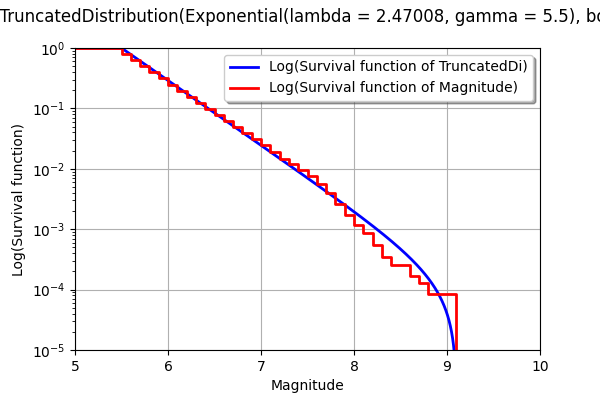

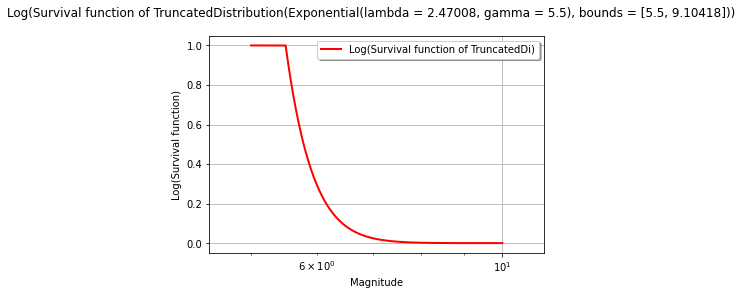

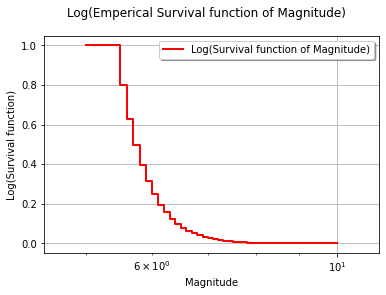

In [ ]:
#Distribution exponentielle  associé

trunc_x_t = build_truncated_exponential(lamda_gamma_parameters[0],gamma_fix,t_pointfix[0])
print(trunc_x_t)
graph_trunc_t= trunc_x_t.drawSurvivalFunction()
#view =viewer.View(graph_trunc)

drawSurvivalVsSample(sample,trunc_x_t)




# Qu'observons nous?

On observe que le graphique de cette question est identique à celui de la question 6  où la troncature est faite par la une valeur fixe, la plus grande observation de l'échantillon. 
Ce qui confirme la méthode de Kijko, la valeur du paramètre de  troncature estime la moyenne de la variable de la plus grande observation. 